# Standard Genetic Algo

In [217]:
from random import randint, uniform
n_pop = 10
n_bits = 8
n_iter = 5
r_cross = 0.8 # crossover rate
r_mut = 0.1 # flip bits with probability

In [218]:
def objective(candidate):
    sum_ = 0
    for bit in candidate:
        sum_ += bit
    return sum_

In [219]:
def selection(pop,scores,k=3):
    # first random selection
    selection_ix = randint(0,len(pop)-1)
    for ix in [randint(0,len(pop)-1) for x in range(k-1)]:
    # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [220]:
# crossover two parents to create two children
def crossover(p1,p2,r_cross):
    print([p1,p2])
    # children are copies of parents by default
    c1 , c2 = p1.copy(), p2.copy()
    # check for recombination
    if uniform(0,1) < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1,c2]

In [221]:
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if uniform(0,1) < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

In [222]:
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [[randint(0,1) for x in range(n_bits)] for _ in range(n_pop)]
    print(pop)
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen, pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

In [226]:
genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut)

[[1, 1, 1, 1, 1, 0, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1], [0, 0, 1, 1, 1, 0, 1, 1], [0, 1, 1, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 0, 1, 0, 1], [0, 1, 1, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1, 1]]
>0, new best f([0, 0, 1, 1, 1, 0, 1, 1]) = 5.000
>0, new best f([0, 0, 1, 0, 1, 0, 1, 1]) = 4.000
[[0, 1, 0, 1, 1, 1, 0, 0], [1, 1, 0, 0, 0, 1, 0, 1]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1, 1]]
>1, new best f([0, 0, 0, 1, 1, 1, 0, 0]) = 3.000
[[0, 0, 0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 0, 0, 0]]
[[0, 1, 0, 1, 1, 0, 0, 0], [0, 1, 0, 1, 1, 0, 0, 0]]
[[0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 1, 1, 1, 1]]
[[0, 1, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 1, 1]]
[[0, 1, 0, 0, 1, 0, 1, 1], [0, 1, 0, 1, 1, 0, 0, 0]]
>2, new best f([0, 1, 0, 0, 1, 0, 0, 0]) = 2.000
[[0, 1, 1, 1,

[[0, 0, 1, 0, 0, 0, 0, 0], 1]

# P&L Table Creation

Target: (rank((vwap - close)) / rank((vwap + close)))
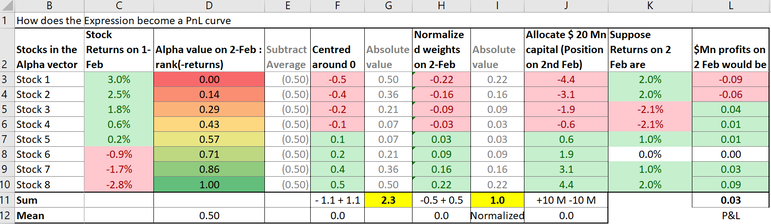

In [8]:
14/100

0.14

In [9]:
6/22

0.2727272727272727

In [31]:
import pandas as pd
from datetime import date
from IPython.display import display

In [100]:
tickers = ['PLD','AMT','PSA','SPG','DLR','EQR']
files_array = {}

for ticker in tickers:
    files_array[ticker] = pd.read_excel('yahoo_finance_reits_data.xlsx',sheet_name=ticker,index_col=0).reset_index()[-500:]

In [101]:
files_array

{'PLD':            Date        Open        High         Low       Close   Volume  \
 5987 2021-09-09  131.094692  131.475776  128.322265  128.350845  2566600   
 5988 2021-09-10  128.741486  128.941549  127.207601  127.312401  1963500   
 5989 2021-09-13  128.398495  128.569978  126.340610  126.502571  1713800   
 5990 2021-09-14  126.950358  127.350500  125.492693  126.283455  1781400   
 5991 2021-09-15  126.721680  127.950701  125.816596  126.988441  2223700   
 ...         ...         ...         ...         ...         ...      ...   
 6482 2023-08-29  123.970001  125.349998  122.760002  125.099998  1833500   
 6483 2023-08-30  125.489998  125.959999  124.699997  125.699997  1849300   
 6484 2023-08-31  125.360001  125.910004  123.889999  124.199997  3277600   
 6485 2023-09-01  125.400002  125.570000  124.050003  124.589996  1591000   
 6486 2023-09-05  124.250000  124.500000  121.860001  122.050003  2854100   
 
       Dividends  Stock Splits  
 5987        0.0             0  
 

In [40]:
string = '(Open+Close+High)/3'
fields = ['Open','Close','High','Low','Volume']
def create_expression(string):
    for field in fields:
        string = string.replace(field,f'x[\'{field}\']')
    return string

print(create_expression(string))

(x['Open']+x['Close']+x['High'])/3


In [132]:
print(create_expression(r"-Volume"))

-x['Volume']


In [163]:
def day_average(df):
    df['Day Ave'] = df.apply(lambda x: (x['Open']+x['Close']+x['High'])/3, axis=1)
    return df

In [157]:
def returns(df):
    df['Yesterday Ave'] = df['Day Ave'].shift()
    df['Dod Return'] = (df['Day Ave'] - df['Yesterday Ave'])/abs(df['Yesterday Ave'])
    df['Tommorrow Ave'] = df['Day Ave'].shift(-1)
    df['2nd Dod Return'] = (df['Tommorrow Ave'] - df['Day Ave'])/abs(df['Day Ave'])
    return df

In [178]:
def alpha_value(df,string):
    df['Alpha Value'] = df.apply(lambda x: eval(create_expression(string)), axis=1)
    return df

In [213]:
def calculate_alpha_performance(files_array,alpha_expr):
    print(f"Calculating performance for alpha: {alpha_expr}")
    combi = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','Dod Return']])
        dod_return.rename(columns={'Dod Return':f'{key} Dod Return'},inplace=True)
        combi = combi.merge(dod_return,on='Date',how='left')
    #print("\nDay on day returns for each ticker:")
    #print(files_array)
    #display(combi)
    
    combination = combi.melt(['Date'], var_name='Ticker', value_name='Dod Return') #need to double melt 2nd dod return
    combination.sort_values('Date', inplace=True)
    combination.dropna(inplace=True)
    #print("\nTranspose df:")
    #display(combination)
    
    combi2 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date'])
    for key,value in files_array.items():
        day_average(value)
        returns(value)
        dod_return = pd.DataFrame(value[['Date','2nd Dod Return']])
        dod_return.rename(columns={'2nd Dod Return':f'{key} Dod Return'},inplace=True)
        combi2 = combi2.merge(dod_return,on='Date',how='left')
    
    #print("\nDay on day returns for following day for each ticker:")
    #display(combi2)
    
    combination2 = combi2.melt(['Date'], var_name='Ticker', value_name='2nd Dod Return') #need to double melt 2nd dod return
    combination2.sort_values('Date', inplace=True)
    combination2.dropna(inplace=True)
    #print("\nTranspose df for following day:")
    #display(combination2)
    
    combi3 = pd.DataFrame(files_array[next(iter(files_array))].reset_index()['Date']) # get list of dates from any ticker
    for key,value in files_array.items():
        alpha_value(value,alpha_expr)
        alpha_return = pd.DataFrame(value[['Date','Alpha Value']])
        alpha_return.rename(columns={'Alpha Value':f'{key} Dod Return'},inplace=True)
        #print("TESTTTT")
        #display(alpha_return)
        #display(combi)
        combi3 = combi3.merge(alpha_return,on='Date',how='left')
    #print("COMBI 3")
    #display(combi3)
        
    #print("\nAlpha value for each ticker:")
    combination4 = combi3.melt(['Date'], var_name='Ticker', value_name='Alpha Value') #need to double melt 2nd dod return
    combination4.sort_values('Date', inplace=True)
    combination4.dropna(inplace=True)
    #print("COMBI 4")
    #display(combination4)
    
    
    combination3 = combination.merge(combination2,how='left',on=['Date','Ticker'])
    combination3 = combination3.merge(combination4,how='left',on=['Date','Ticker'])
    #print("\nMerge both dfs:")
    #display(combination3)
    
    combination3['Rank'] = combination3.sort_values(['Alpha Value'], ascending=[True]).groupby(['Date']).cumcount() + 1
    combination3['Alpha Rank'] = combination3['Rank'].apply(lambda x: x * (1/(len(tickers)-1)) - (1/(len(tickers)-1)))
    combination3['Centered 0'] = combination3['Alpha Rank'] - 0.5
    combination3['Abs Centered 0'] = abs(combination3['Centered 0'])
    combination3['Sum Rank'] = combination3.apply(lambda x: sum(combination3[combination3['Date']==x['Date']]['Abs Centered 0']),axis=1)
    combination3['Normalized'] = combination3.apply(lambda x: -x['Abs Centered 0']/x['Sum Rank'] if x['Centered 0'] < 0 else x['Abs Centered 0']/x['Sum Rank'], axis=1)
    combination3['Allocated'] = combination3['Normalized'] * 20
    combination3['PnL'] = combination3['Allocated'] * combination3['2nd Dod Return']
    #print("\nAllocate portfolio based on Alpha Rank:")
    #display(combination3)
    
    final = combination3[['Date','PnL']]
    pnl = final.groupby(['Date']).sum()
    pnl['PnL'] = pnl['PnL'].cumsum()
    pnl.reset_index(inplace=True)
    display(pnl)
    pnl.plot(kind='line',x='Date',y='PnL');
    
    return combination3,pnl
    
    

Calculating performance for alpha: (Open+Close+High)/3


,Date,PnL
0,2021-09-10,-0.001134
1,2021-09-13,0.052114
2,2021-09-14,0.022667
3,2021-09-15,-0.023784
4,2021-09-16,0.065494
...,...,...
494,2023-08-29,25.202594
495,2023-08-30,25.256671
496,2023-08-31,25.372666
497,2023-09-01,25.411918


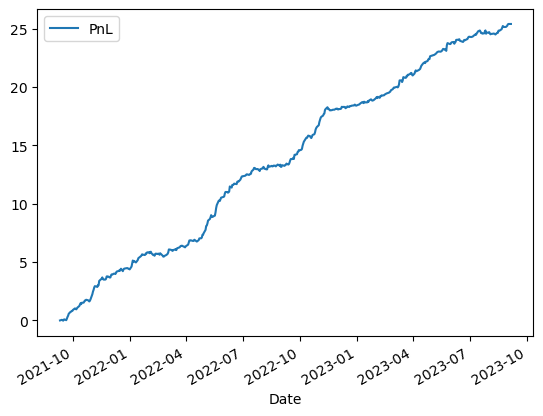

In [130]:
resultDf,pnlDf = calculate_alpha_performance(files_array,string)

![pnl_table_formulation.png](attachment:pnl_table_formulation.png)

In [120]:
pnlDf

,Date,PnL
0,2021-09-10,-0.001134
1,2021-09-13,0.052114
2,2021-09-14,0.022667
3,2021-09-15,-0.023784
4,2021-09-16,0.065494
...,...,...
494,2023-08-29,25.202594
495,2023-08-30,25.256671
496,2023-08-31,25.372666
497,2023-09-01,25.411918


In [209]:
def objective(files_array,candidate_string):
    # Evaluate profit for alpha candidate for 1 year period
    resultDf,pnlDf = calculate_alpha_performance(files_array,candidate_string)
    one_year_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-365,1]  
    six_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-180,1]
    three_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-90,1]  
    one_month_return = pnlDf.iloc[-6,1] - pnlDf.iloc[-30,1]  
    average_return = (one_month_return + three_month_return + six_month_return + one_year_return)/4
    return average_return

Calculating performance for alpha: -(High + Low - Open + Close * ((Low + Volume)) + Close + ((Close)) + ((Volume)))


,Date,PnL
0,2021-09-10,0.026015
1,2021-09-13,-0.010106
2,2021-09-14,-0.034346
3,2021-09-15,-0.038108
4,2021-09-16,-0.031955
...,...,...
494,2023-08-29,1.650782
495,2023-08-30,1.630948
496,2023-08-31,1.621869
497,2023-09-01,1.636629


0.6993177755419269

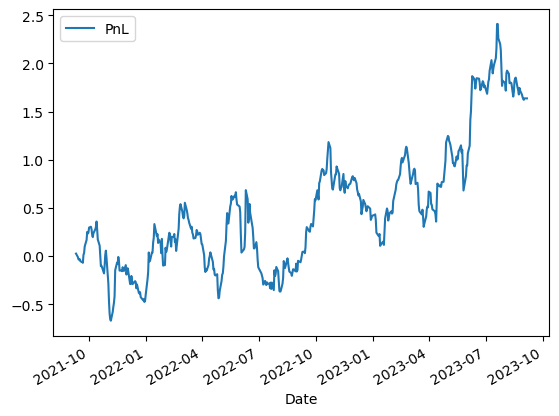

In [216]:
objective(files_array,r"-(High + Low - Open + Close * ((Low + Volume)) + Close + ((Close)) + ((Volume)))")

In [ ]:
def permutate(datafields):
    randint(0,11)

In [76]:
print()

9


In [ ]:
def selection(pop,scores,k=3):
    # first random selection
    selection_ix = randint(0,len(pop)-1)
    for ix in [randint(0,len(pop)-1) for x in range(k-1)]:
    # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [77]:
# Possible additions include methods to evaluate expressions and generate
# some random expressions.

class Expression:
    pass

class Number(Expression):
    def __init__(self, num):
        self.num = num

    def __str__(self):
        return str(self.num)

class BinaryExpression(Expression):
    def __init__(self, left, op, right):
        self.left = left
        self.op = op
        self.right = right

    def __str__(self):
        return str(self.left) + " " + self.op + " "  + str(self.right)

class ParenthesizedExpression(Expression):
    def __init__(self, exp):
        self.exp = exp

    def __str__(self):
        return "(" + str(self.exp) + ")"

e1 = Number(5)

In [97]:
from random import random, randint, choice

def randomAlpha(prob,datafields):
    p = random()
    if p > prob:
        return datafields[randint(0, 4)]
    elif randint(0, 1) == 0:
        return ParenthesizedExpression(randomAlpha(prob / 1.2,datafields))
    else:
        left = randomAlpha(prob / 1.2,datafields)
        op = choice(["+", "-", "*", "/"])
        right = randomAlpha(prob / 1.2,datafields)
        return BinaryExpression(left, op, right)

past_alphas = []
alphas_to_sim = []
for i in range(100):
    duplicate = True
    while duplicate:
        generated = randomAlpha(1,fields)
        if generated not in past_alphas:
            duplicate = False
            past_alphas.append(generated)
            print(generated)
print(past_alphas)

(((Volume * Close))) + (Volume) + Open * Volume * (Close) + High + (Low)
(High + Open)
Low - High * ((Close) - Volume)
((Low) + Low - ((Close)) / High + Close)
((Open))
((Volume)) + Close + Low + ((Volume)) - High + (Volume + Low) * Open
Close - (Close) / (High) / ((Low))
Low * Volume / (Open) * High / Close + High / Close / High
(((((Low)))) + Volume)
((((Open / Low + Volume * Close - Volume)) * Low / High))
(Volume) / High / ((High))
(((Open)))
(Low - (Close - Open)) * Low + Volume + Open - Close * (High) - Close - Low / Close * Volume * Low - Open / High * High - High / Close
(((Low + Low)))
Open - Low + ((Close + Volume))
((High))
Volume * (Close)
Open + Low / Volume + Open + Close + (Close) + Low
(((Volume) * Low) + (Close * Close * Close) / (High))
(Close)
(Close - Open) - ((Open * High * Close + Close))
(((((Open)))) * Close) * (Volume)
((Low / Close * Close / Open))
((Volume * Volume + Open) + (High))
(Open + (Volume) / ((High) - (Volume) * Volume))
(Volume - Open / Volume)
(Op

In [ ]:
# record cost into  (buy-sell)/2 * trading volume (alpha tree)
# if the volume keeps going up the volatility will be lower, liquidity higher (start with higher volatility stock)
# AAPL. and choose some more larger or smaller companies. 3 large, 3 small 3 medium.
# choose the most appropriate alpha signal for each stock, and continuously improve.

In [ ]:
# dont neccesarily need to buy or sell even if the signal moves. << 
# mid term: mid risk minimise risk and max profit. (sharpe ratio)
# 1. how to optimise portfolio weight
# 2. how to trade
# 3. measure risk using formulas, if risk increases then buy or sell, if risk is low, can add probability to buy or sell.
# if risk is low then quickly buy but if risk is high then buy before change.
# High risk, high profit vice versa. 

# try to get more information beyond yahoofinance, for long term indicators. and fundamental data. Annual return must be more than benchmark. Compare against index 

#reason for choice of dataset and stocks
# follow similiar writing to paper: 

# sliding window moving average 5 days moving average. 20 / 50 > 2 moving average crossover
# genetic algorithm to choose when to buy or sell.


In [2]:
import re

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

def parse_arithmetic(expression):
    tokens = re.findall(r'\w+|[()+\-*\/]', expression)

    def parse_expression(tokens):
        node = parse_term(tokens)

        while tokens and tokens[0] in ['+', '-']:
            operator = tokens.pop(0)
            right = parse_term(tokens)
            node = Node(operator)
            node.children.extend([node, right])

        return node

    def parse_term(tokens):
        node = parse_factor(tokens)

        while tokens and tokens[0] in ['*', '/']:
            operator = tokens.pop(0)
            right = parse_factor(tokens)
            node = Node(operator)
            node.children.extend([node, right])

        return node

    def parse_factor(tokens):
        token = tokens.pop(0)

        if token == '(':
            node = parse_expression(tokens)
            tokens.pop(0)  # Consume ')'
            return node
        else:
            return Node(token)

    return parse_expression(tokens)

# Example usage
arithmetic_expression = "a*b+c*(d*(g-f))"
tree_root = parse_arithmetic(arithmetic_expression)

# Helper function to visualize the tree
def print_tree(node, depth=0):
    print("  " * depth + node.value)
    for child in node.children:
        print_tree(child, depth + 1)

print_tree(tree_root)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
https://www.educative.io/answers/how-to-represent-a-mathematical-expression-using-the-parse-tree
    
# 1. implement the parse tree
# 2. randomly select a break point to break the tree and rejoin
# 3. complete the code that tests the data.

In [ ]:
class Node:
    def __init__(self, value, parent):
        self.value = value
        self.children = []
        self.parent = ""

In [4]:
import re

def add_spaces_around_brackets(expression):
    # Add a space before and after every open or close bracket
    modified_expression = re.sub(r'(?<=\w)([()])|([()])(?=\w|$)', r' \1\2 ', expression)

    return modified_expression

# Example usage
input_expression = "((Open / Volume) + Open - Open * (Volume) / Volume * ((Close - Open)))"
result = add_spaces_around_brackets(input_expression)

print(result)

( ( Open / Volume )  + Open - Open *  ( Volume )  / Volume * ( ( Close - Open ) ) ) 


In [8]:
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

def parse_expression(tokens):
    node = parse_term(tokens)

    while tokens and tokens[0] in ['+', '-']:
        operator = tokens.pop(0)
        right = parse_term(tokens)
        new_node = Node(operator)
        new_node.children.extend([node, right])
        node = new_node

    return node

def parse_term(tokens):
    node = parse_factor(tokens)

    while tokens and tokens[0] in ['*', '/']:
        operator = tokens.pop(0)
        right = parse_factor(tokens)
        new_node = Node(operator)
        new_node.children.extend([node, right])
        node = new_node

    return node

def parse_factor(tokens):
    token = tokens.pop(0)

    if token.isdigit():
        return Node(token)
    elif token == '(':
        node = parse_expression(tokens)
        tokens.pop(0)  # Consume ')'
        return node

def parse_math_expression(expression):
    tokens = expression.replace('(', ' ( ').replace(')', ' ) ').split()
    return parse_expression(tokens)

# Example usage
math_expression = "3 + 5 * ( 2 - 8 )"
parse_tree_root = parse_math_expression(math_expression)

# Helper function to visualize the tree
def print_tree(node, depth=0):
    print("  " * depth + str(node.value))
    for child in node.children:
        print_tree(child, depth + 1)

for child in parse_tree_root.children:
    print(child.value)

3
*


In [15]:
def print_vertical_tree(node, level=0, prefix="Root: "):
    if node is not None:
        print(" " * (level * 4) + prefix + str(node.value))
        if node.children:
            print(" " * (level * 4) + "|")
            for child in node.children[:-1]:
                print_vertical_tree(child, level, prefix="")
                print(" " * (level * 4) + "|")
            print_vertical_tree(node.children[-1], level, prefix="")

In [20]:
!pip3 install treelib

  Obtaining dependency information for treelib from https://files.pythonhosted.org/packages/74/93/0944bb5ade972a5ef2dd9211a20730081ed2833024239171807d7a9bd4b0/treelib-1.7.0-py3-none-any.whl.metadata


In [9]:
from treelib import Node, Tree

def build_tree(node, tree, parent=None):
    if node is not None:
        current_node = tree.create_node(str(node.value), node.value, parent=parent)
        for child in node.children:
            build_tree(child, tree, parent=current_node.identifier)

# Example usage
#math_expression = "3 + 5 * ( 2 - 8 )"
#parse_tree_root = parse_math_expression(math_expression)

# Create a tree structure
tree = Tree()
build_tree(parse_tree_root, tree)

# Display the tree
tree.show()

+
├── *
│   ├── -
│   │   ├── 2
│   │   └── 8
│   └── 5
└── 3

